# **Pratcical Assignment 2**: XAI techniques in a supervised learning context on tabular data

### Group PA2_DS1_GC ([Dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024))
- Miguel Santos
- Pedro Azevedo
- Tomás Rodrigues

# **1.** Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

### **1.1** Load dataset & required Python libraries

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\35192\.cache\kagglehub\datasets\luvathoms\portugal-real-estate-2024\versions\8


In [3]:
df = pd.read_csv(path+'\portugal_listinigs.csv')

### **1.2** Dataser overview

- Drop duplicate rows

In [4]:
df.drop_duplicates(inplace=True, keep='first')

In [5]:

def summary(df):
    #print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       270  0.002291     0     4524  117608   
District                 object         0  0.000000     0       25  117878   
City                     object         0  0.000000     0      273  117878   
Town                     object         2  0.000017     0     2251  117876   
Type                     object        15  0.000127     0       21  117863   
EnergyCertificate        object        13  0.000110     0       12  117865   
Floor                    object     91779  0.778593     0       19   26099   
Parking                 float64       146  0.001239     0        4  117732   
HasParking               object     53996  0.458067     0        2   63882   
ConstructionYear        float64     40262  0.341557     0      124   77616   
TotalArea               float64      7123  0.060427     0     7252  110755   
GrossArea               float64     91864  0.779314     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.542188     0       11   53966   
PublishDate              object     96491  0.818567     0    21367   21387   
Garage                   object     63912  0.542188     0        2   53966   
Elevator                 object        30  0.000255     0        2  117848   
ElectricCarsCharging     object     63912  0.542188     0        2   53966   
TotalRooms              float64     52370  0.444273     0       58   65508   
NumberOfBedrooms        float64     81193  0.688788     0       22   36685   
NumberOfWC              float64     70655  0.599391     0       26   47223   
ConservationStatus       object    102312  0.867948     0        6   15566   
LivingArea              float64     27345  0.231977     0     2947   90533   
LotSize                 float64     85347  0.724028     0     6537   32531   
BuiltArea               float64     96395  0.817752     0     6647   21483   
NumberOfBathrooms       float64      5864  0.049746     0       44  112014   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369763.444142   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0         0.5538   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0    1988.532609   
TotalArea             -7196067.0  61420071105.0  589763.713385   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.192465   
NumberOfBedrooms             0.0           21.0       2.689083   
NumberOfWC                 -15.0           59.0         0.4206   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1510.732407   
LotSize                      0.0    992301000.0   63657.036089   
BuiltArea                   -1.0     12750000.0    3416.130458   
NumberOfBathrooms          -13.0           90.0       1.524658   

                      Standard Deviation           First Value  \
Price                      4074358.56897              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

- To ensure a realistic and consistent approach for our study, we have decided to focus exclusively on properties classified as either apartments or houses. Additionally, we will exclude any entries with null values, addressing the extensive nature of the dataset and its inconsistencies across various database updates.

In [6]:
selected_types = ['Apartment', 'House']
# Filter the dataset
filtered_df = df[df['Type'].isin(selected_types)]
filtered_df.reset_index(drop=True, inplace=True)

In [7]:
summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       270  0.002291     0     4524  117608   
District                 object         0  0.000000     0       25  117878   
City                     object         0  0.000000     0      273  117878   
Town                     object         2  0.000017     0     2251  117876   
Type                     object        15  0.000127     0       21  117863   
EnergyCertificate        object        13  0.000110     0       12  117865   
Floor                    object     91779  0.778593     0       19   26099   
Parking                 float64       146  0.001239     0        4  117732   
HasParking               object     53996  0.458067     0        2   63882   
ConstructionYear        float64     40262  0.341557     0      124   77616   
TotalArea               float64      7123  0.060427     0     7252  110755   
GrossArea               float64     91864  0.779314     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.542188     0       11   53966   
PublishDate              object     96491  0.818567     0    21367   21387   
Garage                   object     63912  0.542188     0        2   53966   
Elevator                 object        30  0.000255     0        2  117848   
ElectricCarsCharging     object     63912  0.542188     0        2   53966   
TotalRooms              float64     52370  0.444273     0       58   65508   
NumberOfBedrooms        float64     81193  0.688788     0       22   36685   
NumberOfWC              float64     70655  0.599391     0       26   47223   
ConservationStatus       object    102312  0.867948     0        6   15566   
LivingArea              float64     27345  0.231977     0     2947   90533   
LotSize                 float64     85347  0.724028     0     6537   32531   
BuiltArea               float64     96395  0.817752     0     6647   21483   
NumberOfBathrooms       float64      5864  0.049746     0       44  112014   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369763.444142   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0         0.5538   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0    1988.532609   
TotalArea             -7196067.0  61420071105.0  589763.713385   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.192465   
NumberOfBedrooms             0.0           21.0       2.689083   
NumberOfWC                 -15.0           59.0         0.4206   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1510.732407   
LotSize                      0.0    992301000.0   63657.036089   
BuiltArea                   -1.0     12750000.0    3416.130458   
NumberOfBathrooms          -13.0           90.0       1.524658   

                      Standard Deviation           First Value  \
Price                      4074358.56897              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

- We began by removing faulty entries in the *Number of Bedrooms* field. Then analyzes the dataset iteratively after each adjustment until a clean and reliable dataset was achieved.

In [8]:

filtered_df = filtered_df.dropna(subset=['NumberOfBedrooms'])

In [9]:
#reset the index
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64       102  0.003180     0     2930  31975   
District                 object         0  0.000000     0       24  32077   
City                     object         0  0.000000     0      267  32077   
Town                     object         0  0.000000     0     2044  32077   
Type                     object         0  0.000000     0        2  32077   
EnergyCertificate        object         0  0.000000     0       11  32077   
Floor                    object     32077  1.000000     0        0      0   
Parking                 float64         0  0.000000     0        2  32077   
HasParking               object     32077  1.000000     0        0      0   
ConstructionYear        float64      2913  0.090813     0      119  29164   
TotalArea               float64         0  0.000000     0      907  32077   
GrossArea               float64     32077  1.000000     0        0      0   
EnergyEfficiencyLevel    object         0  0.000000     0       11  32077   
PublishDate              object     17799  0.554884     0    14271  14278   
Garage                   object         0  0.000000     0        2  32077   
Elevator                 object         0  0.000000     0        2  32077   
ElectricCarsCharging     object         0  0.000000     0        2  32077   
TotalRooms              float64     15752  0.491068     0       33  16325   
NumberOfBedrooms        float64         0  0.000000     0       22  32077   
NumberOfWC              float64      3695  0.115192     0       15  28382   
ConservationStatus       object     19747  0.615612     0        6  12330   
LivingArea              float64         2  0.000062     0      857  32075   
LotSize                 float64     17332  0.540325     0     2824  14745   
BuiltArea               float64     16412  0.511644     0     4806  15665   
NumberOfBathrooms       float64       110  0.003429     0       22  31967   

                          Min         Max       Average Standard Deviation  \
Price                     1.0  16800000.0  404689.07121      513277.002387   
District                  NaN         NaN           NaN                NaN   
City                      NaN         NaN           NaN                NaN   
Town                      NaN         NaN           NaN                NaN   
Type                      NaN         NaN           NaN                NaN   
EnergyCertificate         NaN         NaN           NaN                NaN   
Floor                     NaN         NaN           NaN                NaN   
Parking                   0.0         1.0      0.393117            0.48845   
HasParking                NaN         NaN           NaN                NaN   
ConstructionYear       1900.0      2024.0   1991.449047          27.341197   
TotalArea              -271.0    420000.0     251.56249        4359.129363   
GrossArea                 NaN         NaN           NaN                NaN   
EnergyEfficiencyLevel     NaN         NaN           NaN                NaN   
PublishDate               NaN         NaN           NaN                NaN   
Garage                    NaN         NaN           NaN                NaN   
Elevator                  NaN         NaN           NaN                NaN   
ElectricCarsCharging      NaN         NaN           NaN                NaN   
TotalRooms                0.0      2751.0      4.521409          21.636578   
NumberOfBedrooms          0.0        21.0      2.799389           1.432395   
NumberOfWC              -15.0        59.0      0.541998            1.00654   
ConservationStatus        NaN         NaN           NaN                NaN   
LivingArea                0.0    470300.0    230.122463        4268.256274   
LotSize                   0.0  48750000.0   9485.420549      415270.341695   
BuiltArea                -1.0    470300.0    321.846559        5588.551914   
NumberOfBathrooms       -13.0        62.0      2.116871           1.4

- Drop the columns with **$\approx 50\% \text{ or more}$** missing data.

In [10]:

filtered_df.drop(["GrossArea", "PublishDate", "HasParking", "Floor", "TotalRooms", "ConservationStatus", "LotSize","BuiltArea"], axis=1, inplace=True)
filtered_df.dropna(subset=['Price'],inplace=True)

In [11]:
filtered_df = filtered_df.reset_index(drop=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0  0.000000  1104     2930  31975   
District                 object         0  0.000000  1104       24  31975   
City                     object         0  0.000000  1104      267  31975   
Town                     object         0  0.000000  1104     2044  31975   
Type                     object         0  0.000000  1104        2  31975   
EnergyCertificate        object         0  0.000000  1104       11  31975   
Parking                 float64         0  0.000000  1104        2  31975   
ConstructionYear        float64      2873  0.089851  1104      119  29102   
TotalArea               float64         0  0.000000  1104      906  31975   
EnergyEfficiencyLevel    object         0  0.000000  1104       11  31975   
Garage                   object         0  0.000000  1104        2  31975   
Elevator                 object         0  0.000000  1104        2  31975   
ElectricCarsCharging     object         0  0.000000  1104        2  31975   
NumberOfBedrooms        float64         0  0.000000  1104       22  31975   
NumberOfWC              float64      3694  0.115528  1104       15  28281   
LivingArea              float64         2  0.000063  1104      855  31973   
NumberOfBathrooms       float64       110  0.003440  1104       22  31865   

                          Min         Max       Average Standard Deviation  \
Price                     1.0  16800000.0  404689.07121      513277.002387   
District                  NaN         NaN           NaN                NaN   
City                      NaN         NaN           NaN                NaN   
Town                      NaN         NaN           NaN                NaN   
Type                      NaN         NaN           NaN                NaN   
EnergyCertificate         NaN         NaN           NaN                NaN   
Parking                   0.0         1.0      0.392557           0.488327   
ConstructionYear       1900.0      2024.0   1991.396227          27.337954   
TotalArea              -271.0    420000.0    251.711775        4366.071196   
EnergyEfficiencyLevel     NaN         NaN           NaN                NaN   
Garage                    NaN         NaN           NaN                NaN   
Elevator                  NaN         NaN           NaN                NaN   
ElectricCarsCharging      NaN         NaN           NaN                NaN   
NumberOfBedrooms          0.0        21.0      2.798812           1.433486   
NumberOfWC              -15.0        59.0      0.542201           1.007291   
LivingArea                0.0    470300.0    230.276202          4275.0546   
NumberOfBathrooms       -13.0        62.0      2.113918           1.481606   

                      First Value                   Second Value  \
Price                     62000.0                        98000.0   
District                   Aveiro                         Aveiro   
City                         Ovar             Albergaria-a-Velha   
Town                       Válega  Albergaria-a-Velha e Valmaior   
Type                        House                      Apartment   
EnergyCertificate               F                              F   
Parking                       1.0                            0.0   
ConstructionYear           1950.0                         1992.0   
TotalArea                   336.0                           81.0   
EnergyEfficiencyLevel           F                              F   
Garage                      False                          False   
Elevator                    False                          False   
ElectricCarsCharging        False                          False   
NumberOfBedrooms              2.0                            2.0   
NumberOfWC                    NaN                            0.0   
LivingArea                  300.0                           81.0   
NumberOfBathrooms             1.0                            1.0   

     

- Remove the remaining rows with missing data.

In [12]:
filtered_df.dropna(subset=['ConstructionYear'],inplace=True)
filtered_df.dropna(subset=['NumberOfWC'],inplace=True)
filtered_df.dropna(subset=['LivingArea'],inplace=True)

In [13]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0       0.0   613     2490  25814   
District                 object         0       0.0   613       23  25814   
City                     object         0       0.0   613      266  25814   
Town                     object         0       0.0   613     2000  25814   
Type                     object         0       0.0   613        2  25814   
EnergyCertificate        object         0       0.0   613       11  25814   
Parking                 float64         0       0.0   613        2  25814   
ConstructionYear        float64         0       0.0   613      118  25814   
TotalArea               float64         0       0.0   613      871  25814   
EnergyEfficiencyLevel    object         0       0.0   613       11  25814   
Garage                   object         0       0.0   613        2  25814   
Elevator                 object         0       0.0   613        2  25814   
ElectricCarsCharging     object         0       0.0   613        2  25814   
NumberOfBedrooms        float64         0       0.0   613       21  25814   
NumberOfWC              float64         0       0.0   613       13  25814   
LivingArea              float64         0       0.0   613      829  25814   
NumberOfBathrooms       float64         0       0.0   613       20  25814   

                          Min         Max        Average Standard Deviation  \
Price                   600.0  16800000.0  398743.563086      528680.240472   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.363059           0.480891   
ConstructionYear       1900.0      2024.0    1991.513868          27.646156   
TotalArea              -271.0    420000.0     271.360696        4800.255931   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0       2.856938           1.465531   
NumberOfWC                0.0        14.0       0.524057           0.938767   
LivingArea                0.0    470300.0     230.134346        4235.191714   
NumberOfBathrooms         0.0        24.0         2.1032           1.476885   

                                         First Value        Second Value  \
Price                                        98000.0            220000.0   
District                                      Aveiro              Aveiro   
City                              Albergaria-a-Velha  Oliveira do Bairro   
Town                   Albergaria-a-Velha e Valmaior             Palhaça   
Type                                       Apartment               House   
EnergyCertificate                                  F                   F   
Parking                                          0.0                 0.0   
ConstructionYear                              1992.0              1993.0   
TotalArea                                       81.0               154.0   
EnergyEfficiencyLevel                              F                   F   
Garage                                         False                True   
Elevator                                       False               False   
ElectricCarsCharging                           False               False   
NumberOfBedrooms                                 2.0                 4.0   
NumberOfWC                                       0.0                 1.0

- Ensure that $\text{TotalArea} > 0$ 
- Ensure that $\text{LivingArea} > 0$ 

In [14]:
filtered_df= filtered_df[filtered_df["TotalArea"]>0].reset_index(drop=True)
filtered_df= filtered_df[filtered_df["LivingArea"]>0].reset_index(drop=True)

- See if there are outliers.

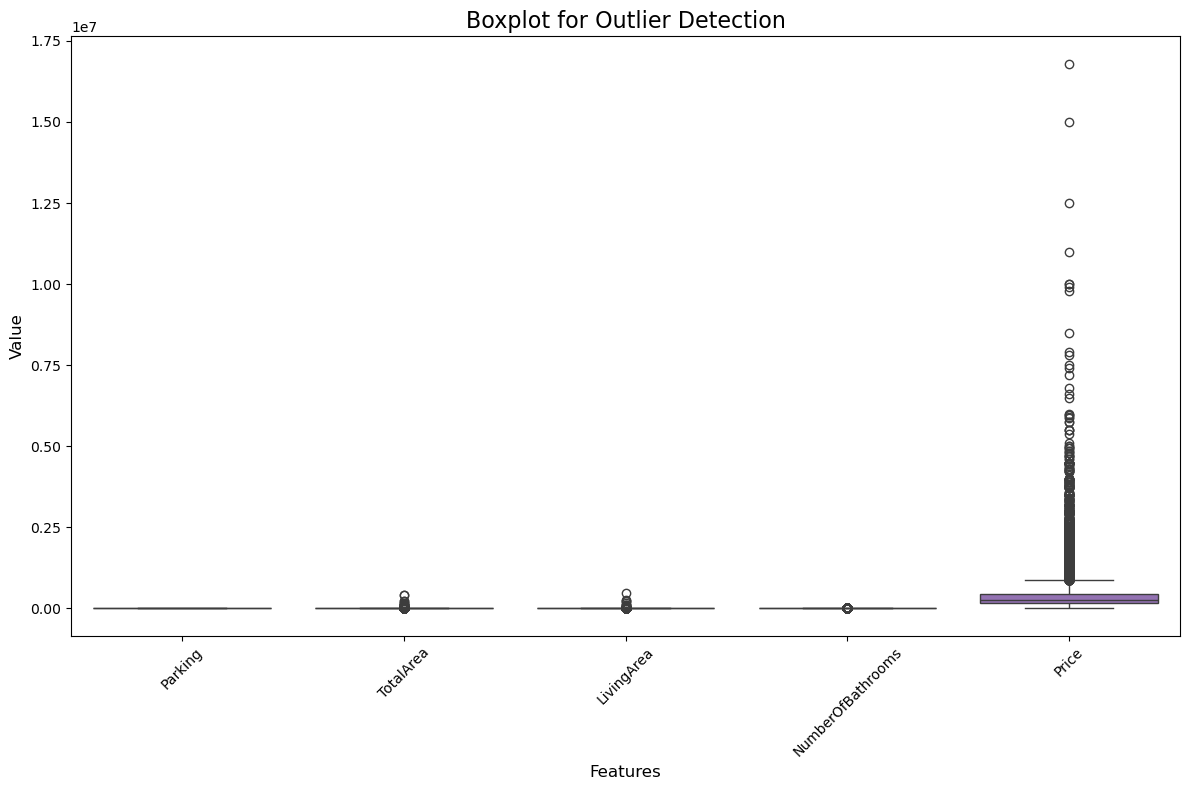

In [15]:
plt.figure(figsize=(12, 8))

numerical_columns= [ 'Parking','TotalArea', 'LivingArea', 'NumberOfBathrooms','Price']
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

- Now we remove the outliers.

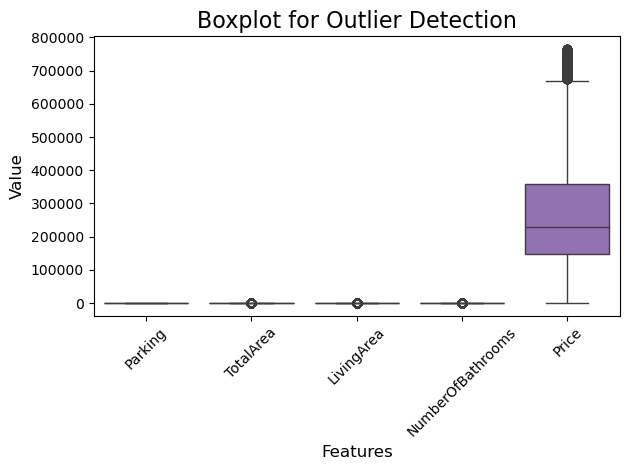

In [16]:
def remove_outliers(df, numerical_columns):
    
    data = df.copy()
    
    for feature in data[numerical_columns].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data
# Remove outliers
filtered_df = remove_outliers(filtered_df, numerical_columns)
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
profile = ProfileReport(filtered_df, title="Apartment/House")

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- EnergyEfficiencyLevel and EnergyCertificate appears to be highly correlated, so we remove one of them.

In [19]:
filtered_df.drop(["EnergyEfficiencyLevel"], axis=1, inplace=True)

In [20]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                  float64         0       0.0   493     1879  21141   
District                object         0       0.0   493       22  21141   
City                    object         0       0.0   493      264  21141   
Town                    object         0       0.0   493     1911  21141   
Type                    object         0       0.0   493        2  21141   
EnergyCertificate       object         0       0.0   493       11  21141   
Parking                float64         0       0.0   493        2  21141   
ConstructionYear       float64         0       0.0   493      114  21141   
TotalArea              float64         0       0.0   493      319  21141   
Garage                  object         0       0.0   493        2  21141   
Elevator                object         0       0.0   493        2  21141   
ElectricCarsCharging    object         0       0.0   493        2  21141   
NumberOfBedrooms       float64         0       0.0   493       16  21141   
NumberOfWC             float64         0       0.0   493        6  21141   
LivingArea             float64         0       0.0   493      280  21141   
NumberOfBathrooms      float64         0       0.0   493        6  21141   

                         Min       Max        Average Standard Deviation  \
Price                  600.0  765070.0  263849.251218      169384.890915   
District                 NaN       NaN            NaN                NaN   
City                     NaN       NaN            NaN                NaN   
Town                     NaN       NaN            NaN                NaN   
Type                     NaN       NaN            NaN                NaN   
EnergyCertificate        NaN       NaN            NaN                NaN   
Parking                  0.0       1.0       0.343503           0.474889   
ConstructionYear      1900.0    2024.0    1990.009791          27.528228   
TotalArea               10.0     333.0     116.620926          57.475261   
Garage                   NaN       NaN            NaN                NaN   
Elevator                 NaN       NaN            NaN                NaN   
ElectricCarsCharging     NaN       NaN            NaN                NaN   
NumberOfBedrooms         0.0      18.0       2.582565           1.190492   
NumberOfWC               0.0       5.0       0.429592           0.744721   
LivingArea               1.0     283.0     111.650679          54.668722   
NumberOfBathrooms        0.0       5.0        1.76529           1.025304   

                                        First Value  \
Price                                       98000.0   
District                                     Aveiro   
City                             Albergaria-a-Velha   
Town                  Albergaria-a-Velha e Valmaior   
Type                                      Apartment   
EnergyCertificate                                 F   
Parking                                         0.0   
ConstructionYear                             1992.0   
TotalArea                                      81.0   
Garage                                        False   
Elevator                                      False   
ElectricCarsCharging                          False   
NumberOfBedrooms                                2.0   
NumberOfWC                                      0.0   
LivingArea                                     81.0   
NumberOfBathrooms                               1.0   

                                   Second Value Third Value  
Price                                  290000.0    182000.0  
District                                 Aveiro      Aveiro  
City                       Santa Maria da Feira     Espinho  
Town                  Canedo, Vale e Vila Maior     Espinho  
Type                                      House   Apartment  
EnergyCertificate                             F           D  
Parking                                     0.0         1.0  
Con

In [21]:
filtered_df.drop_duplicates(inplace=True, keep='first')



- We have two categorical features that can be important but have a high number of unique values, so we will to deal with them.


In [22]:
filtered_df["District"].value_counts()

Lisboa                 5123
Porto                  3114
Setúbal                1894
Braga                  1598
Faro                   1483
Coimbra                1373
Leiria                 1110
Santarém               1007
Aveiro                 1003
Castelo Branco          637
Viana do Castelo        549
Portalegre              372
Évora                   346
Vila Real               321
Guarda                  268
Beja                    205
Bragança                176
Ilha de Santa Maria      44
Ilha de São Miguel       10
Viseu                     8
Ilha Terceira             5
Ilha de Porto Santo       2
Name: District, dtype: int64

- In the feature district we join the districts with a low number of values in a onther class other.

In [23]:
pd.set_option("display.max_rows", None)
location_stats = filtered_df.groupby('District')['District'].agg('count').sort_values(ascending=False)
les100 = location_stats[location_stats<=100]
filtered_df.District = filtered_df.District.apply(lambda x: 'other' if x in les100 else x)
filtered_df["District"].value_counts()


Lisboa              5123
Porto               3114
Setúbal             1894
Braga               1598
Faro                1483
Coimbra             1373
Leiria              1110
Santarém            1007
Aveiro              1003
Castelo Branco       637
Viana do Castelo     549
Portalegre           372
Évora                346
Vila Real            321
Guarda               268
Beja                 205
Bragança             176
other                 69
Name: District, dtype: int64

- For the cities we join them by region,creating the feature Region.

In [24]:
def classi(cit):    
    city_regions = {
        "Lisbon Metropolitan Area": [
            "Lisboa", "Sintra", "Loures", "Amadora", "Cascais", "Setúbal", "Seixal", "Vila Franca de Xira", "Oeiras",
            "Odivelas", "Almada", "Barreiro", "Montijo", "Moita", "Mafra", "Palmela", "Alcochete", "Sobral de Monte Agraço","Alenquer",
            "Arruda dos Vinhos", "Sesimbra", "Azambuja", "Benavente", "Almeirim", "Salvaterra de Magos", "Alpiarça", "Golegã", "Constância", "Alcanena"
        ],
        "Norte": [
            "Porto", "Vila Nova de Gaia", "Braga", "Matosinhos", "Gondomar", "Guimarães", "Maia", "Valongo",
            "Vila Nova de Famalicão", "Felgueiras", "Marco de Canaveses", "Vila Verde", "Viana do Castelo", "Vila do Conde",
            "Póvoa de Varzim", "Trofa", "Santo Tirso", "Barcelos", "Esposende", "Freixo de Espada à Cinta", "Carrazeda de Ansiães",
            "Vila Flor", "Alijó", "Bragança", "Vimioso", "Torre de Moncorvo", "Celorico de Basto", "Vila Nova de Cerveira",
            "Caminha", "Valença", "Ponte da Barca", "Ponte de Lima", "Santa Maria da Feira", "Fafe", "Paredes", "Penafiel",
            "Amarante", "Amares", "Espinho", "Póvoa de Lanhoso", "Paços de Ferreira", "Arcos de Valdevez", "Baião",
            "Cabeceiras de Basto", "Vieira do Minho", "Vizela", "Terras de Bouro", "Mondim de Basto", "Cinfães", "Arouca",
            "Castelo de Paiva", "Alfândega da Fé","São João da Madeira","Lousada","Chaves", "Peso da Régua", "Macedo de Cavaleiros", 
            "Vila Real", "Monção", "Montalegre", "Melgaço", "Mesão Frio", "Paredes de Coura", "Sabrosa","Castelo de Vide","Porto Moniz",
            "Castro Daire",
              "Valpaços", "Ribeira de Pena", "Vila Pouca de Aguiar", "Murça", "Vinhais", "Mirandela", "Boticas", "Mogadouro", "Miranda do Douro"
        ],
        "Centro": [
            "Coimbra", "Figueira da Foz", "Aveiro", "Leiria", "Covilhã", "Alcobaça", "Torres Vedras", "Ílhavo", "Fundão",
            "Lourinhã", "Caldas da Rainha", "Entroncamento", "Tomar", "Torres Novas", "Ovar", "Pombal", "Peniche", "Vagos",
            "Anadia", "Abrantes", "Castelo Branco", "Lousã", "Cartaxo", "Montemor-o-Velho", "Cantanhede", "Penamacor",
            "Idanha-a-Nova", "Soure", "Ansião", "Ferreira do Zêzere", "Mortágua", "Albergaria-a-Velha", "Oliveira de Azeméis",
            "Sever do Vouga", "Águeda", "Estarreja", "Tábua", "Góis", "Miranda do Corvo", "Penela", "Ourém", "Batalha",
            "Porto de Mós", "Figueiró dos Vinhos", "Castanheira de Pêra", "Oleiros", "Pampilhosa da Serra", "Proença-a-Nova",
            "Guarda", "Gouveia", "Sabugal", "Fornos de Algodres", "Pinhel", "Trancoso", "Mêda", "Aguiar da Beira",
            "Figueira de Castelo Rodrigo", "Vila Nova de Poiares", "Óbidos", "Bombarral", "Cadaval", "Rio Maior", "Mealhada",
            "Oliveira do Hospital", "Seia", "Arganil", "Penacova", "Condeixa-a-Nova", "Mira", "Alvaiázere", "Sertã", "Mação",
            "Vila Velha de Ródão", "Santa Marta de Penaguião", "Belmonte", "Vale de Cambra", "Manteigas", "Celorico da Beira",
            "Vila Nova de Foz Côa", "Sardoal", "Pedrógão Grande", "Tondela","Santarém","Nazaré","Marinha Grande","Oliveira do Bairro",
            "Murtosa","Almeida","Vila de Rei","Vila Nova da Barquinha"
        ],
        "Alentejo": [
            "Évora", "Beja", "Elvas", "Portalegre", "Vendas Novas", "Grândola", "Reguengos de Monsaraz", "Castro Verde",
            "Ourique", "Coruche", "Avis", "Alter do Chão", "Vila Viçosa", "Borba", "Mora", "Mourão", "Redondo", "Sousel",
            "Portel", "Alandroal", "Arronches", "Crato", "Campo Maior", "Ferreira do Alentejo", "Mértola", "Nisa", "Vidigueira",
            "Arraiolos", "Fronteira", "Almodôvar", "Moura", "Serpa", "Santiago do Cacém", "Sines", "Aljustrel", "Alcácer do Sal",
            "Montemor-o-Novo", "Viana do Alentejo", "Estremoz", "Ponte de Sor", "Monforte", "Gavião", "Chamusca", "Cuba", "Alvito", "Barrancos","Marvão"
        ],
        "Algarve": [
            "Faro", "Albufeira", "Portimão", "Lagos", "Tavira", "Loulé", "Aljezur", "Monchique", "São Brás de Alportel",
            "Vila Real de Santo António", "Silves", "Castro Marim", "Lagoa (Algarve)", "Vila do Bispo", "Olhão", "Alcoutim", "Odemira"
        ],
        "Açores": [
            "Ponta Delgada", "Angra do Heroísmo", "Praia da Vitória", "Ribeira Grande", "Horta", "Vila do Porto", "Vila Franca do Campo", "Lagoa (São Miguel)"
        ],
        "Madeira": [
            "Funchal", "Machico", "Santa Cruz", "Câmara de Lobos", "Porto Santo", "Madeira"
        ]
    }
    for region, cities in city_regions.items():
        if cit in cities:
            return region
    return cit

filtered_df["Region"]=filtered_df['City'].apply(classi)
filtered_df= filtered_df.drop('City',axis=1)

In [25]:
filtered_df["Region"].value_counts()

Lisbon Metropolitan Area    6726
Norte                       5977
Centro                      5284
Algarve                     1546
Alentejo                    1054
Açores                        59
Madeira                        2
Name: Region, dtype: int64

- In here we save the dataset

In [26]:
filtered_df.to_csv('filtered_df.csv', index=False)

- Running a TSNE

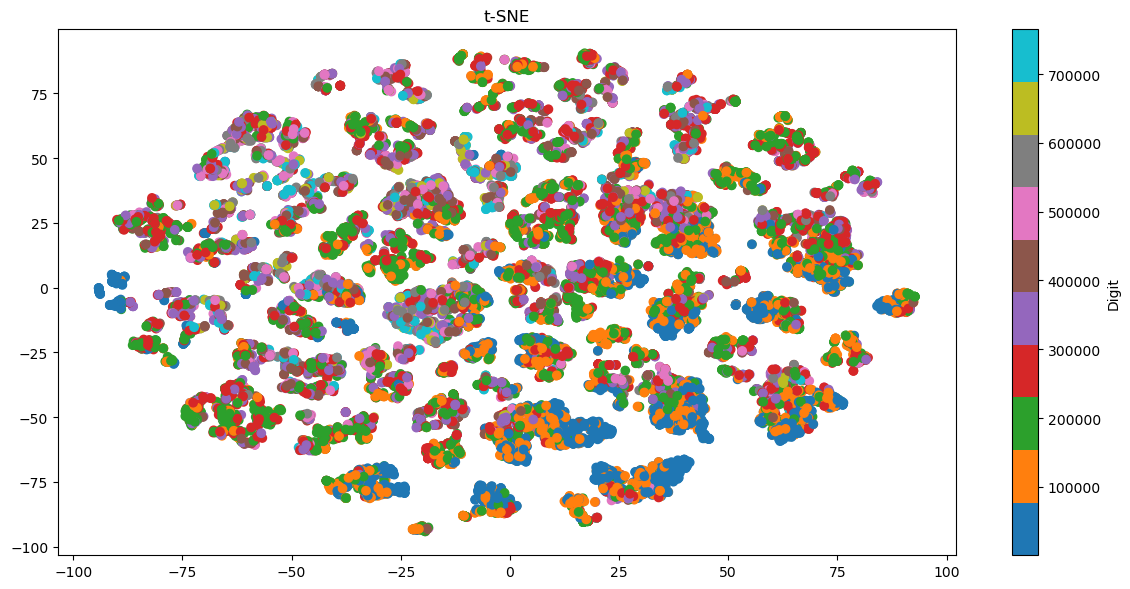

In [27]:
df= pd.read_csv('./filtered_df.csv')
encoder = LabelEncoder()
df["EnergyCertificate"]= encoder.fit_transform(df["EnergyCertificate"])
X = df.drop(["Price","Town","Garage","Parking"],axis=1)
X = pd.get_dummies(X, drop_first=True) 
y = df['Price']
scaler = StandardScaler()
X = scaler.fit_transform(X)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_filtered_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 6))
plt.scatter(X_filtered_tsne[:, 0], X_filtered_tsne[:, 1], c=y, cmap='tab10')
plt.colorbar(label='Digit')
plt.title("t-SNE")
plt.tight_layout()
plt.show()